In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
data = pd.read_csv("column_2C_weka.csv")

In [6]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

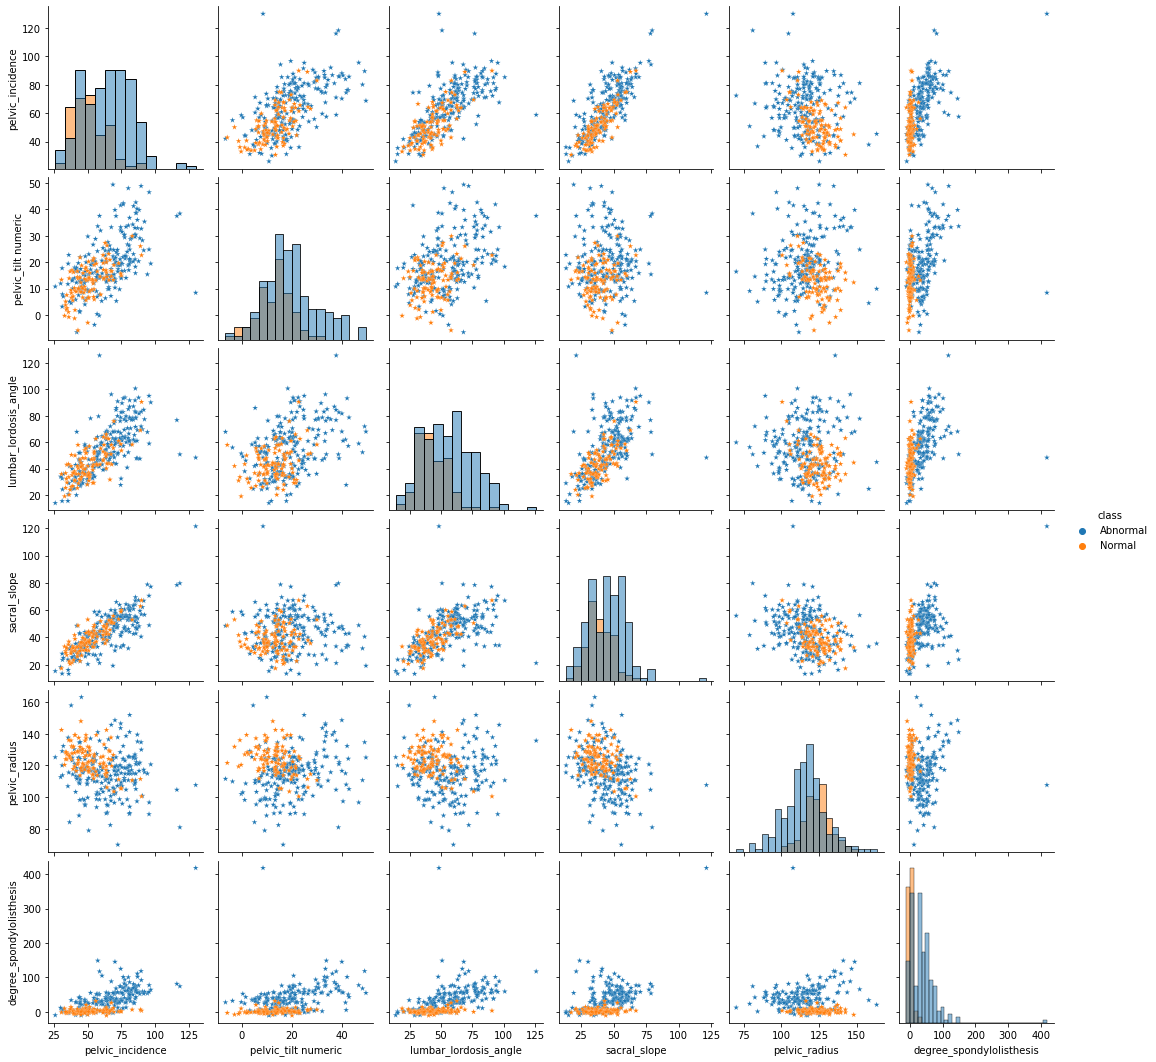

In [13]:
#Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):
sns.pairplot(data, hue="class", diag_kind="hist", plot_kws=dict(marker="*", linewidth=0.1))

Abnormal    210
Normal      100
Name: class, dtype: int64

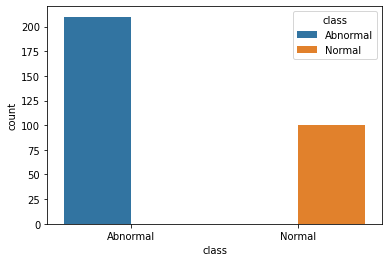

In [14]:
sns.countplot(x="class",hue="class",data=data)
data.loc[:,'class'].value_counts()

In [15]:
y = data.loc[:,'class']
x = data.drop(["class"], axis=1)

In [16]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size= 0.3, random_state=1)

In [17]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


In [18]:
print("prediction:", prediction)

prediction: ['Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal']


In [19]:
# Find best K value
test_accuracy = []

for each in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))

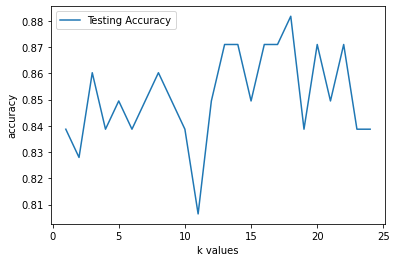

In [22]:
# PLOT
plt.plot(range(1,25),test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8817204301075269


In [24]:
#Confisuon Matrix
y_pred=knn.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true,y_pred)

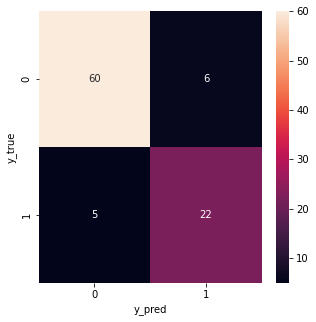

In [27]:
#Visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linecolor="red" ,fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()